In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [22]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint-philippe re
hilo us
albany au
mount isa au
tessalit ml
ponta do sol cv
hami cn
wencheng cn
santo domingo ni
khatanga ru
rikitea pf
srednekolymsk ru
kutum sd
almansa es
mataura pf
bud no
georgetown sh
nikolskoye ru
norman wells ca
rikitea pf
pangai to
formoso do araguaia br
avarua ck
ushuaia ar
roma au
haibowan cn
tasiilaq gl
camacha pt
punta arenas cl
kruisfontein za
hilo us
busselton au
kaitangata nz
bethel us
suntar ru
yerbogachen ru
najran sa
ponta do sol cv
butaritari ki
avera pf
dikson ru
busselton au
kuhdasht ir
caravelas br
kapaa us
punta arenas cl
padang id
rikitea pf
korla cn
rikitea pf
chernyshevskiy ru
chuy uy
upernavik gl
sambava mg
rikitea pf
tumannyy ru
castro cl
cherskiy ru
rikitea pf
sibolga id
thompson ca
bambanglipuro id
otane nz
rikitea pf
jambi id
byron bay au
bangkalan id
carnarvon au
ushuaia ar
dingle ie
celestun mx
moose factory ca
ndele cf
castro cl
mar del plata ar
codrington ag
yellowknife ca
castro cl
busselton au
erenhot cn
carutapera br
richards bay z

castro cl
esperance au
dwarka in
nizhneyansk ru
labutta mm
sao filipe cv
ushuaia ar
mataura pf
busselton au
punta arenas cl
new norfolk au
busselton au
dhadar pk
georgetown sh
davila ph
kapaa us
punta arenas cl
hilo us
lamar us
chokurdakh ru
hithadhoo mv
inhambane mz
hobart au
gao ml
nisia floresta br
puerto ayora ec
ca mau vn
vostochnyy ru
albany au
waipawa nz
lasa cn
ushuaia ar
avarua ck
mataura pf
beringovskiy ru
kamenka ru
bay roberts ca
busselton au
bani walid ly
cape town za
westport nz
ponta do sol cv
ushuaia ar
aksay kz
ribeira grande pt
mataura pf
hermanus za
vaini to
bredasdorp za
vestmannaeyjar is
new norfolk au
ushuaia ar
barrow us
torbay ca
nguiu au
thompson ca
new norfolk au
xuzhou cn
belushya guba ru
williston us
barentsburg sj
mahebourg mu
umzimvubu za
punta arenas cl
juxtlahuaca mx
mayumba ga
punta arenas cl
tuktoyaktuk ca
cape town za
alta floresta br
sitka us
sentyabrskiy ru
chuy uy
mataura pf
talnakh ru
jamestown sh
san quintin mx
calamar co
coahuayana mx
punta aren

kapaa us
rikitea pf
bethel us
hobart au
saint george bm
palabuhanratu id
saint-philippe re
butaritari ki
ushuaia ar
ponazyrevo ru
kaeo nz
padang id
illoqqortoormiut gl
ushuaia ar
kavieng pg
somerset east za
hithadhoo mv
kultuk ru
yellowknife ca
tasiilaq gl
yellowknife ca
norman wells ca
rocha uy
tezu in
bonavista ca
fairbanks us
isangel vu
tuatapere nz
ushuaia ar
busselton au
kodiak us
ous ru
shitanjing cn
biak id
rikitea pf
souillac mu
kaliua tz
praia cv
sentyabrskiy ru
ambilobe mg
lolua tv
khatanga ru
bluff nz
ostersund se
bredasdorp za
padang id
provideniya ru
illoqqortoormiut gl
newport us
kenai us
yilan cn
plettenberg bay za
ponta do sol cv
kamenskoye ru
konevo ru
ahtopol bg
codrington ag
taolanaro mg
el alto pe
barrow us
mahebourg mu
chokurdakh ru
benguela ao
valkeala fi
monrovia lr
grand river south east mu
norman wells ca
tuktoyaktuk ca
tuatapere nz
atuona pf
bluff nz
la sarre ca
chernyshevskiy ru
chicama pe
vaini to
barrow us
sao joao da barra br
bluff nz
quito ec
taoudenni ml

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [24]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=308830fefaa639c5ced9944d254648f2


In [26]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [28]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | tessalit
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | hami
Processing Record 8 of Set 1 | wencheng
Processing Record 9 of Set 1 | santo domingo
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | srednekolymsk
Processing Record 13 of Set 1 | kutum
Processing Record 14 of Set 1 | almansa
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | bud
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | pangai
Processing Record 21 of Set 1 | formoso do araguaia
City not found. Skipping...
Processing Record 22 of Set 1 | avarua
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of 

City not found. Skipping...
Processing Record 39 of Set 4 | ca mau
Processing Record 40 of Set 4 | aliaga
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | khuzdar
Processing Record 43 of Set 4 | rio gallegos
Processing Record 44 of Set 4 | grand gaube
Processing Record 45 of Set 4 | karratha
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | shitanjing
Processing Record 50 of Set 4 | puerto ayora
Processing Record 1 of Set 5 | loandjili
Processing Record 2 of Set 5 | campechuela
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | maceio
Processing Record 5 of Set 5 | paamiut
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | matamoros
Processing Record 9 of Set 5 | kavaratti
Processing Record 10 of Set 5 |

Processing Record 26 of Set 8 | beringovskiy
Processing Record 27 of Set 8 | kamenka
Processing Record 28 of Set 8 | bay roberts
Processing Record 29 of Set 8 | bani walid
Processing Record 30 of Set 8 | westport
Processing Record 31 of Set 8 | aksay
Processing Record 32 of Set 8 | nguiu
City not found. Skipping...
Processing Record 33 of Set 8 | xuzhou
Processing Record 34 of Set 8 | williston
Processing Record 35 of Set 8 | juxtlahuaca
Processing Record 36 of Set 8 | mayumba
Processing Record 37 of Set 8 | alta floresta
Processing Record 38 of Set 8 | talnakh
Processing Record 39 of Set 8 | san quintin
Processing Record 40 of Set 8 | calamar
Processing Record 41 of Set 8 | coahuayana
Processing Record 42 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 8 | pangkalanbuun
Processing Record 44 of Set 8 | gravdal
Processing Record 45 of Set 8 | emerald
Processing Record 46 of Set 8 | lakes entrance
Processing Record 47 of Set 8 | oktyabrskoye
Processing Rec

Processing Record 13 of Set 12 | alta
Processing Record 14 of Set 12 | abnub
Processing Record 15 of Set 12 | luyang
Processing Record 16 of Set 12 | kishtwar
Processing Record 17 of Set 12 | moiyabana
City not found. Skipping...
Processing Record 18 of Set 12 | narayangarh
Processing Record 19 of Set 12 | laguna
Processing Record 20 of Set 12 | saint george
Processing Record 21 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 22 of Set 12 | ponazyrevo
Processing Record 23 of Set 12 | kaeo
Processing Record 24 of Set 12 | somerset east
Processing Record 25 of Set 12 | kultuk
Processing Record 26 of Set 12 | tezu
Processing Record 27 of Set 12 | bonavista
Processing Record 28 of Set 12 | ous
Processing Record 29 of Set 12 | biak
Processing Record 30 of Set 12 | kaliua
Processing Record 31 of Set 12 | praia
Processing Record 32 of Set 12 | ambilobe
Processing Record 33 of Set 12 | lolua
City not found. Skipping...
Processing Record 34 of Set 12 | ostersund
Processi

In [29]:
len(city_data)

569

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,76.55,83,54,3.74,RE,2021-05-26 15:13:55
1,Hilo,19.7297,-155.0900,71.62,82,90,6.91,US,2021-05-26 15:12:54
2,Albany,42.6001,-73.9662,85.32,62,55,9.89,US,2021-05-26 15:11:59
3,Mount Isa,-20.7333,139.5000,65.97,20,0,16.11,AU,2021-05-26 15:13:56
4,Tessalit,20.1986,1.0114,107.67,5,98,16.55,ML,2021-05-26 15:13:56
5,Ponta Do Sol,32.6667,-17.1000,75.00,68,86,0.51,PT,2021-05-26 15:13:56
6,Hami,42.8000,93.4500,82.78,12,0,3.51,CN,2021-05-26 15:13:57
7,Wencheng,33.0559,113.7978,70.68,72,100,8.16,CN,2021-05-26 15:13:57
8,Santo Domingo,18.5001,-69.9886,87.48,64,40,0.00,DO,2021-05-26 15:08:58
9,Khatanga,71.9667,102.5000,30.49,98,100,11.16,RU,2021-05-26 15:13:58


In [31]:
city_data_df = city_data_df [["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-05-26 15:13:55,-21.3585,55.7679,76.55,83,54,3.74
1,Hilo,US,2021-05-26 15:12:54,19.7297,-155.0900,71.62,82,90,6.91
2,Albany,US,2021-05-26 15:11:59,42.6001,-73.9662,85.32,62,55,9.89
3,Mount Isa,AU,2021-05-26 15:13:56,-20.7333,139.5000,65.97,20,0,16.11
4,Tessalit,ML,2021-05-26 15:13:56,20.1986,1.0114,107.67,5,98,16.55
5,Ponta Do Sol,PT,2021-05-26 15:13:56,32.6667,-17.1000,75.00,68,86,0.51
6,Hami,CN,2021-05-26 15:13:57,42.8000,93.4500,82.78,12,0,3.51
7,Wencheng,CN,2021-05-26 15:13:57,33.0559,113.7978,70.68,72,100,8.16
8,Santo Domingo,DO,2021-05-26 15:08:58,18.5001,-69.9886,87.48,64,40,0.00
9,Khatanga,RU,2021-05-26 15:13:58,71.9667,102.5000,30.49,98,100,11.16


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

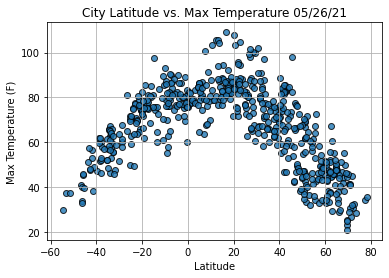

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

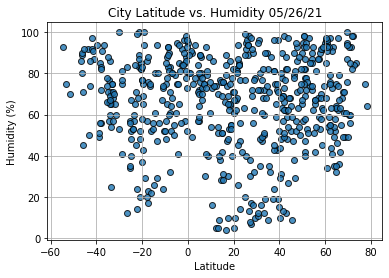

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

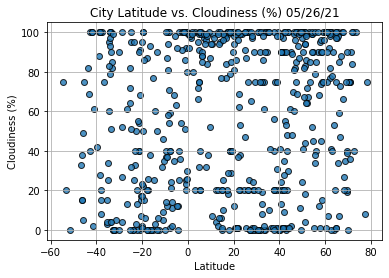

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

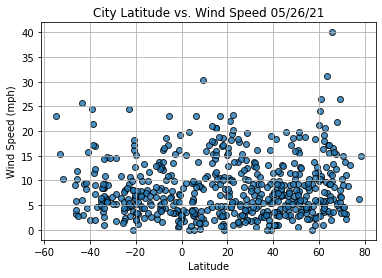

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()